# NEURAL NETWORKS -- Project 1

In [1]:
# Importing the TensorFlow library
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1: Import Data

In [2]:
# Import the signal.csv file
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/PGP AIML Course Files/Neural Networks Deep Learning/Assignment/Signal.csv')

## Step 2: Data Analysis & Visualization

In [3]:
# Data Head
data.head() 

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape
# This dataframe has 12 columns and 1599 rows

(1599, 12)

In [5]:
data.info()
# All seems okay - no missing data points (some can be 0 which we will check later)
# All pramaters are float64 (Which is correct)
# The last one Signal Strength is integer64 which is also correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.isna().sum()
# Checked again, no missing values

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [7]:
data.describe()
# Description of the data parameters
# as we can see using min - there is no 0, therefore no 0's exist as well in this dataset

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


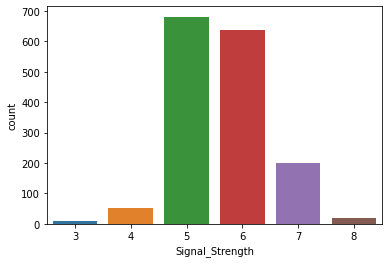

In [8]:
sns.countplot(data=data, x='Signal_Strength')
# As we can see majority of the cases the signal strength is 5 or 6

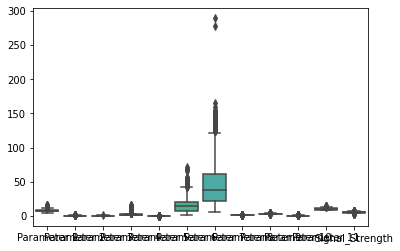

In [9]:
sns.boxplot(data=data)
# There are definately some outliers but considering the type of data I doubt we should treat them for this exercise

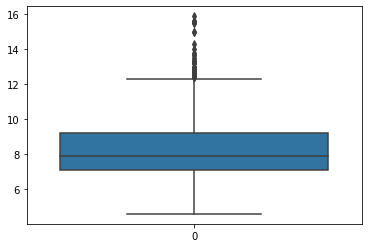

In [11]:
sns.boxplot(data=data['Parameter 1'])

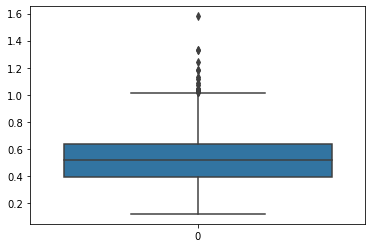

In [12]:
sns.boxplot(data=data['Parameter 2'])

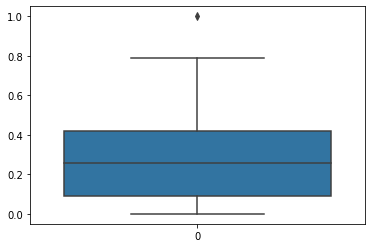

In [13]:
sns.boxplot(data=data['Parameter 3'])

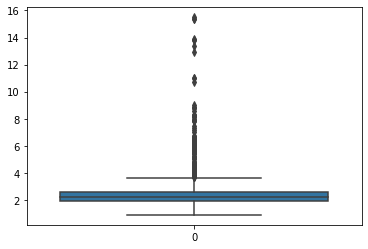

In [14]:
sns.boxplot(data=data['Parameter 4'])

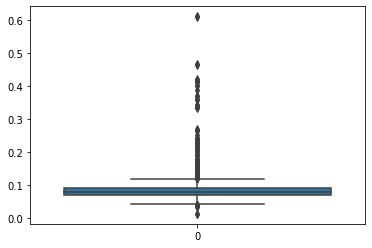

In [15]:
sns.boxplot(data=data['Parameter 5'])

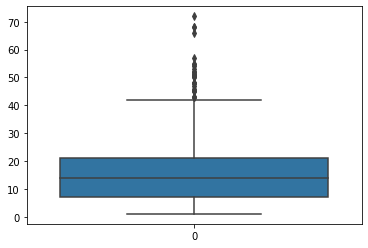

In [16]:
sns.boxplot(data=data['Parameter 6'])

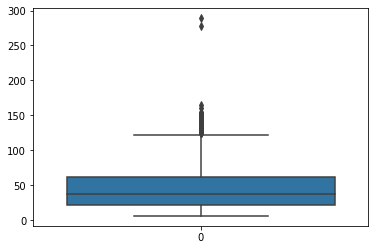

In [17]:
sns.boxplot(data=data['Parameter 7'])

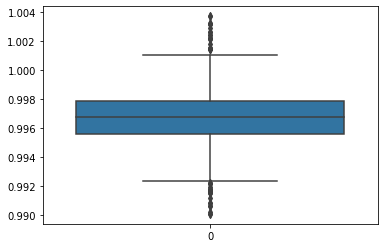

In [18]:
sns.boxplot(data=data['Parameter 8'])

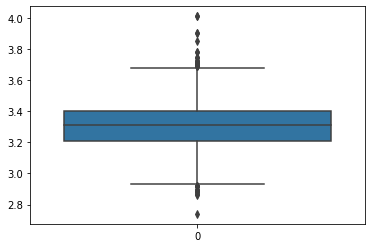

In [19]:
sns.boxplot(data=data['Parameter 9'])

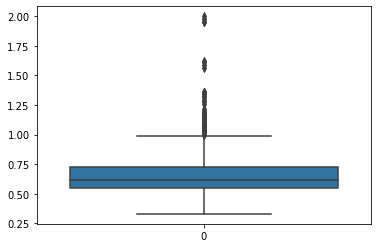

In [20]:
sns.boxplot(data=data['Parameter 10'])

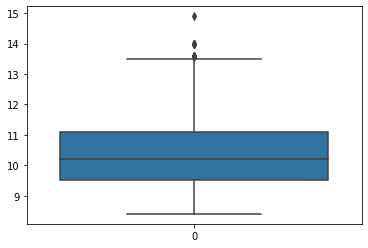

In [21]:
sns.boxplot(data=data['Parameter 11'])

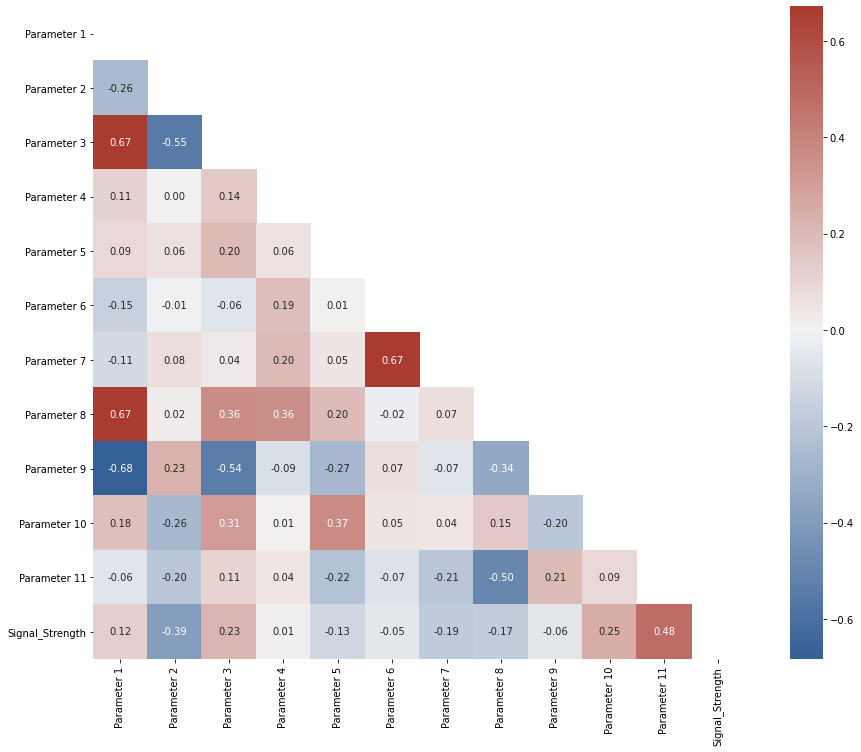

In [22]:
# Calculate pairwise-correlation
matrix = data.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

plt.figure(figsize=(16, 12))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

plt.show()

#### Findings

1. Based on the nature of the data (signal inputs) we will not be treating the outliers above.
2. We will let the neural network decide the weights for each of the parameters
3. The correlation plots indicate some relationships among the parameters, but nothing significant i.e. it is between 67% to -55%. 

## Step 3: Neural Network Regressor


In [23]:
# Reusable Lift Chart for Plotting the Accuracy
def chart_regression(pred, y, sort=True):
  t = pd.DataFrame({'pred':pred, 'y':y.flatten()})
  if sort:
    t.sort_values(by=['y'], inplace=True)
  plt.plot(t['y'].tolist(), label='expected')
  plt.plot(t['pred'].tolist(), label='prediction')
  plt.ylabel('output')
  plt.legend()
  plt.show()  

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, ReLU, Dropout

In [25]:
tf.compat.v1.reset_default_graph()
tf.random.set_seed(88)

X=data.drop('Signal_Strength',axis=1)
y=data['Signal_Strength']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25)

se=StandardScaler()
X_train = se.fit_transform(X_train)
X_test = se.fit_transform(X_test)

In [26]:
model = Sequential()
model.add(tf.keras.Input(shape=11))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

In [27]:
#from tensorflow.keras.losses import MeanAbsoluteError
model.compile(optimizer='adam',loss=tf.keras.losses.MeanAbsoluteError())

model.fit(X_train,y_train,batch_size=16,epochs=120,validation_data=(X_test,y_test))

Epoch 1/120
75/75 [==============================] - 4s 8ms/step - loss: 3.4686 - val_loss: 1.3121
Epoch 2/120
75/75 [==============================] - 0s 3ms/step - loss: 1.6613 - val_loss: 0.9677
Epoch 3/120
75/75 [==============================] - 0s 3ms/step - loss: 1.5122 - val_loss: 0.9945
Epoch 4/120
75/75 [==============================] - 0s 3ms/step - loss: 1.4119 - val_loss: 0.8343
Epoch 5/120
75/75 [==============================] - 0s 3ms/step - loss: 1.3204 - val_loss: 0.8554
Epoch 6/120
75/75 [==============================] - 0s 3ms/step - loss: 1.2587 - val_loss: 0.7890
Epoch 7/120
75/75 [==============================] - 0s 3ms/step - loss: 1.1813 - val_loss: 0.6565
Epoch 8/120
75/75 [==============================] - 0s 3ms/step - loss: 1.2165 - val_loss: 0.6661
Epoch 9/120
75/75 [==============================] - 0s 3ms/step - loss: 1.2698 - val_loss: 0.7783
Epoch 10/120
75/75 [==============================] - 0s 3ms/step - loss: 1.1797 - val_loss: 0.6993
Epoch 11/

In [28]:
from sklearn import metrics

pred = model.predict(X_test)
score = metrics.mean_squared_error(pred, y_test)
print(f"MSE Score {score}")

MSE Score 0.40990250095312264


In [29]:
model.save('/content/drive/MyDrive/Machine Learning/PGP AIML Course Files/Neural Networks Deep Learning/Assignment/nnet_regression.h5')

#### Conclusion

1. Tried with a single layer of 64 units with RELU activation functions, batch size was 32, trained for 50 epochs - MSE was 0.47
2. Increased the layers to 3 (64,128,32) with RELU, batch size decreased to 16, trained for 50 epochs - MSE was 0.462
3. Added dropout layers of (0.15, 0.10, 0.05), batch size decreased to 16, trained for 100 epochs - MSE was 0.402 (Went with this final model as the training and validation loss both were same around 0.49) - hence a good fit model.

## Step 4: Neural Network Classifier


In [33]:
tf.compat.v1.reset_default_graph()
tf.random.set_seed(88)

X2_train,X2_test,y2_train,y2_test = train_test_split(X,y, test_size=0.25)

y2_train =tf.keras.utils.to_categorical(y2_train, num_classes=10) 
y2_test =tf.keras.utils.to_categorical(y2_test, num_classes=10) 

In [34]:
model2 = Sequential()
model2.add(tf.keras.Input(shape=11))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.20))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.15))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.10))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.05))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

model2.fit(X2_train,y2_train,batch_size=32,epochs=100,validation_data=(X2_test,y2_test))

Epoch 1/100
38/38 [==============================] - 1s 9ms/step - loss: 2.2383 - accuracy: 0.3452 - val_loss: 1.2169 - val_accuracy: 0.4750
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 1.2212 - accuracy: 0.4714 - val_loss: 1.2230 - val_accuracy: 0.4825
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 1.2590 - accuracy: 0.4419 - val_loss: 1.1782 - val_accuracy: 0.4850
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 1.2261 - accuracy: 0.4631 - val_loss: 1.2201 - val_accuracy: 0.4675
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 1.1724 - accuracy: 0.4746 - val_loss: 1.2155 - val_accuracy: 0.4725
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 1.2029 - accuracy: 0.4536 - val_loss: 1.2118 - val_accuracy: 0.4550
Epoch 7/100
38/38 [==============================] - 0s 4ms/step - loss: 1.2041 - accuracy: 0.5004 - val_loss: 1.1888 - val_accuracy: 0.4625
Epoch 8/100
3

In [35]:
# Evaluating the model with test data
model2.evaluate(X2_test, y2_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.9892 - accuracy: 0.5825


[0.9892420768737793, 0.5824999809265137]

In [37]:
model2.save('/content/drive/MyDrive/Machine Learning/PGP AIML Course Files/Neural Networks Deep Learning/Assignment/nnet_classification.h5')


#### Conclusion

1. Vanila model with one layer of 64 units with Relu and training for 100 epochs with 32 batch size - Given an accuracy around 56%
2. 4 layers (64, 128, 256, 64) with RELU, 100 epochs and batch size of 16 gives an accuracy of - 72% in training and 57% in test i.e. it started overfitting (lets use dropout now to increase random inputs)
3. By adding 4 dropouts of (0.20,0.15,0.10,0.05) the accuracy increased to 62%

## Step 5: Clickable GUI

In [38]:
import tkinter as tk
from tkinter import ttk
import re
import pandas as pd

In [39]:
# App Window
win = tk.Tk()
win.title('CLASSIFIER GUI')
win.geometry("700x300")


# Step 1 -- Import Data Frame Name

Name = ttk.Label(win,text="Step 1: File Name")
Name.grid(row=0,column=0,sticky=tk.W)

Name_var = tk.StringVar()
Name_entrybox = ttk.Entry(win,width=16,textvariable=Name_var)
Name_entrybox.grid(row=0,column=1)


def Import_Data():
    global DB
    DF_Name = Name_var.get()
    DB_extension=re.findall("\..*", DF_Name)
    if DB_extension == ['.xlsx']:
        DB=pd.read_excel(DF_Name)
        confirm='Done'
    elif DB_extension==['.csv']:
        DB=pd.read_csv(DF_Name)
        confirm='Done'
    else:
        confirm='File Not Found'
        
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=0,column=3)
    Confirm_entrybox.insert(1,str(confirm))
    
Import_Data_Button = ttk.Button(win,text='Import Data', command=Import_Data)
Import_Data_Button.grid(row=0,column=2)

# Step 2: Target data frame name ----------------

Target = ttk.Label(win,text='Step 2: Target Column')
Target.grid(row=1,column=0,sticky=tk.W)

Target_var=tk.StringVar()
Target_entrybox=ttk.Entry(win,width=16,textvariable=Target_var)
Target_entrybox.grid(row=1,column=1)

def Target_Data():
    global DB, X, y, Target_Name, X_train, X_test, y_train, y_test, X2_train, X2_test, y2_train, y2_test
    Target_Name = Target_var.get()
    
    Column_name=DB.columns
    
    for i in range(len(Column_name)):
        if Column_name[i]==Target_Name:
            confirm='Found'
            y=DB[Target_Name]
            X=DB.drop(Target_Name,axis=1)
            
            from sklearn.model_selection import train_test_split
            X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
            X2_train,X2_test,y2_train,y2_test = train_test_split(X,y, test_size=0.25)
            
        else:
            confirm='Not Found'

    Confirm_entrybox=ttk.Entry(win, width=16)
    Confirm_entrybox.grid(row=1,column=3)
    Confirm_entrybox.insert(1, str(confirm))
    
Target_Button= ttk.Button(win,text='Import Target', command=Target_Data)
Target_Button.grid(row=1,column=2)

# Step 3

Target = ttk.Label(win,text='Step 3: Neural Network Regressor')
Target.grid(row=3,column=0,sticky=tk.W)

Target = ttk.Label(win,text='Regression')
Target.grid(row=4,column=0,sticky=tk.W)

def train_NeuralRegressor():
    
    global regmodel
    
    regmodel = Sequential()
    regmodel.add(tf.keras.Input(shape=11))
    regmodel.add(Dense(64, activation='relu'))
    regmodel.add(Dropout(0.15))
    regmodel.add(Dense(128, activation='relu'))
    regmodel.add(Dropout(0.10))
    regmodel.add(Dense(32, activation='relu'))
    regmodel.add(Dropout(0.5))
    regmodel.add(Dense(1, activation='linear'))

    
    #from tensorflow.keras.losses import MeanAbsoluteError
    regmodel.compile(optimizer='adam',loss=tf.keras.losses.MeanAbsoluteError())

    regmodel.fit(X_train,y_train,batch_size=50,epochs=12,validation_data=(X_test,y_test))

    Confirm_nnregbox=ttk.Entry(win, width=25)
    Confirm_nnregbox.grid(row=4,column=2)
    Confirm_nnregbox.insert(1, 'Network Trained')
    
NNreg_Button= ttk.Button(win,text='Train', command=train_NeuralRegressor)
NNreg_Button.grid(row=4,column=1)

picklereg = ttk.Label(win,text='Pickle')
picklereg.grid(row=5,column=0,sticky=tk.W)

def pickle_NeuralRegressor():

    regmodel.save('regmodel.h5')

    train_NeuralRegressor(pickle='True')

    Confirm_picklennregbox=ttk.Entry(win, width=25)
    Confirm_picklennregbox.grid(row=5,column=2)
    Confirm_picklennregbox.insert(1, 'Saved Model to Disk')
    
picklereg_Button= ttk.Button(win,text='Run', command=pickle_NeuralRegressor)
picklereg_Button.grid(row=5,column=1)

# Step 4:
    
Target = ttk.Label(win,text='Step 4: Neural Network Classifier')
Target.grid(row=6,column=0,sticky=tk.W)

Target = ttk.Label(win,text='Classifier')
Target.grid(row=7,column=0,sticky=tk.W)

def train_NeuralClassifier():
    
    global classmodel
    
    y2_train =tf.keras.utils.to_categorical(y2_train, num_classes=10) 
    y2_test =tf.keras.utils.to_categorical(y2_test, num_classes=10)

    classmodel = Sequential()
    classmodel.add(tf.keras.Input(shape=11))
    classmodel.add(Dense(64, activation='relu'))
    classmodel.add(Dropout(0.20))
    classmodel.add(Dense(128, activation='relu'))
    classmodel.add(Dropout(0.15))
    classmodel.add(Dense(256, activation='relu'))
    classmodel.add(Dropout(0.10))
    classmodel.add(Dense(64, activation='relu'))
    classmodel.add(Dropout(0.05))
    classmodel.add(Dense(10, activation='softmax'))

    classmodel.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

    classmodel.fit(X2_train,y2_train,batch_size=50,epochs=10,validation_data=(X2_test,y2_test))

    Confirm_nnclassbox=ttk.Entry(win, width=25)
    Confirm_nnclassbox.grid(row=7,column=2)
    Confirm_nnclassbox.insert(1, 'Network Trained')
    
NNclass_Button= ttk.Button(win,text='Train', command=train_NeuralClassifier)
NNclass_Button.grid(row=7,column=1)

pickleclass = ttk.Label(win,text='Pickle')
pickleclass .grid(row=8,column=0,sticky=tk.W)

def pickle_NeuralClass():
    
    classmodel.save('classmodel.h5')

    train_NeuralClassifier(pickle='True')

    Confirm_picklennclassbox=ttk.Entry(win, width=25)
    Confirm_picklennclassbox.grid(row=8,column=2)
    Confirm_picklennclassbox.insert(1, 'Saved Model to Disk')
    
pickleclass_Button= ttk.Button(win,text='Run', command=pickle_NeuralClass)
pickleclass_Button.grid(row=8,column=1)

win.mainloop()

TclError: ignored

# Conclusion

1. EDA was done on the signal dataset and the dataset did have a significant number of outliers.

2. We have built two models above - one is a classifier and one is regression both with a very basic level of accuracy (further scope for improvement does exists)

3. We have also built the tkinter application, which can be run as is and it will generate a pop up window exactly as it was requested in the assignment
